<a href="https://colab.research.google.com/github/sreehaas-1342/Customer_data_cleaning_and_prediction/blob/main/customer_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving unclean_customer_data.csv to unclean_customer_data.csv


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df = pd.read_csv('unclean_customer_data.csv')
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077


from matplotlib import pyplot as plt
_df_0['Customer_ID'].plot(kind='hist', bins=20, title='Customer_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Annual_Income'].plot(kind='hist', bins=20, title='Annual_Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Spending_Score'].plot(kind='hist', bins=20, title='Spending_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Customer_ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Annual_Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Annual_Income', y='Spending_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Spending_Score', y='Purchase_Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Customer_ID'].plot(kind='line', figsize=(8, 4), title='Customer_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Annual_Income'].plot(kind='line', figsize=(8, 4), title='Annual_Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Spending_Score'].plot(kind='line', figsize=(8, 4), title='Spending_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

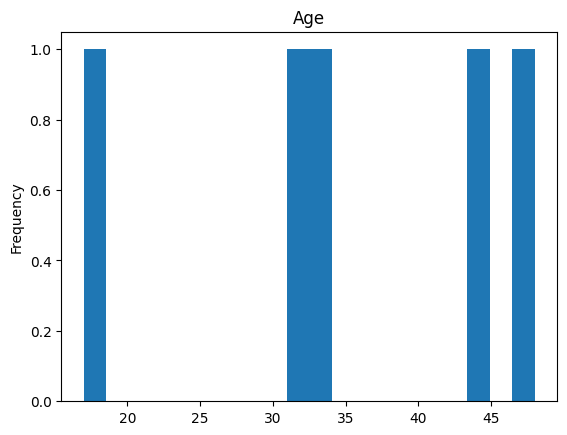

In [ ]:
from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         10200 non-null  int64  
 1   Age                 9943 non-null   float64
 2   Annual_Income       10200 non-null  float64
 3   Spending_Score      10200 non-null  float64
 4   Purchase_Frequency  10200 non-null  int64  
 5   Transaction_Amount  9944 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 478.3 KB


,0
Customer_ID,0
Age,257
Annual_Income,0
Spending_Score,0
Purchase_Frequency,0
Transaction_Amount,256


In [ ]:
df = df.dropna().drop_duplicates()
df['Customer_ID'] = df['Customer_ID'].drop_duplicates()
df = df.dropna()
df

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270.0,31.0,75851.592212,77.104268,17,129.724190
1,1860.0,48.0,44460.183764,61.349076,25,91.479265
2,6390.0,17.0,43677.755605,22.589956,9,130.573812
3,6191.0,34.0,48666.812544,82.069525,0,72.395846
4,6734.0,44.0,46080.334029,65.076915,3,156.399077
...,...,...,...,...,...,...
9989,6747.0,27.0,35503.103186,25.652282,18,70.095056
9990,2723.0,48.0,61798.909540,42.835074,21,135.276696
9991,8224.0,28.0,49884.843230,16.976396,5,62.144692
9994,5215.0,29.0,53689.566030,35.970910,22,82.977455


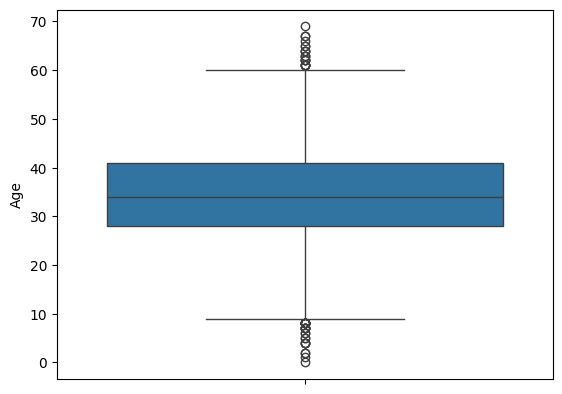

In [ ]:
sns.boxplot(df['Age'])
plt.show()

# Remove age outliers
df = df[df['Age'] <= 100]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Spending_Score'] = scaler.fit_transform(df[['Spending_Score']])
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270.0,31.0,75851.592212,0.769009,17,129.724190
1,1860.0,48.0,44460.183764,0.609789,25,91.479265
2,6390.0,17.0,43677.755605,0.218093,9,130.573812
3,6191.0,34.0,48666.812544,0.819188,0,72.395846
4,6734.0,44.0,46080.334029,0.647462,3,156.399077


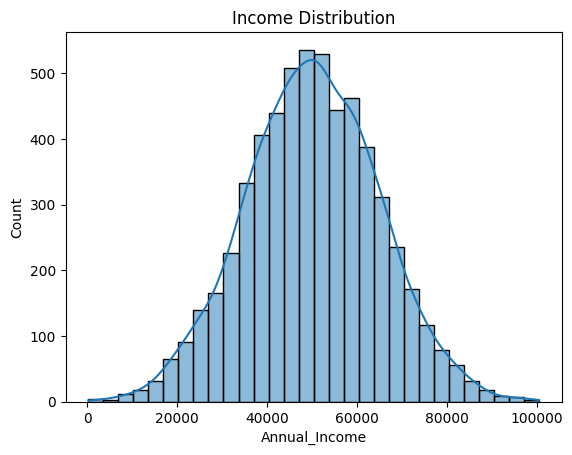

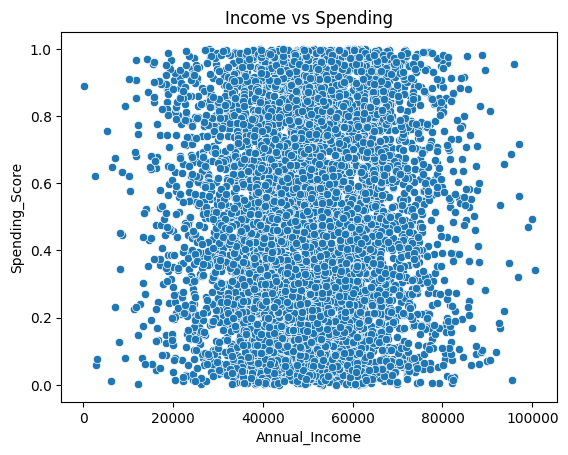

In [ ]:
df = df[df['Annual_Income'] > 0]

sns.histplot(df['Annual_Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df)
plt.title("Income vs Spending")
plt.show()

In [46]:
df.to_csv("cleaned_customer_data.csv", index=False)
files.download("cleaned_customer_data.csv")
df = pd.read_csv("cleaned_customer_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Enter age: 23
Enter annual income: 23
Enter spending score: 23
21.0


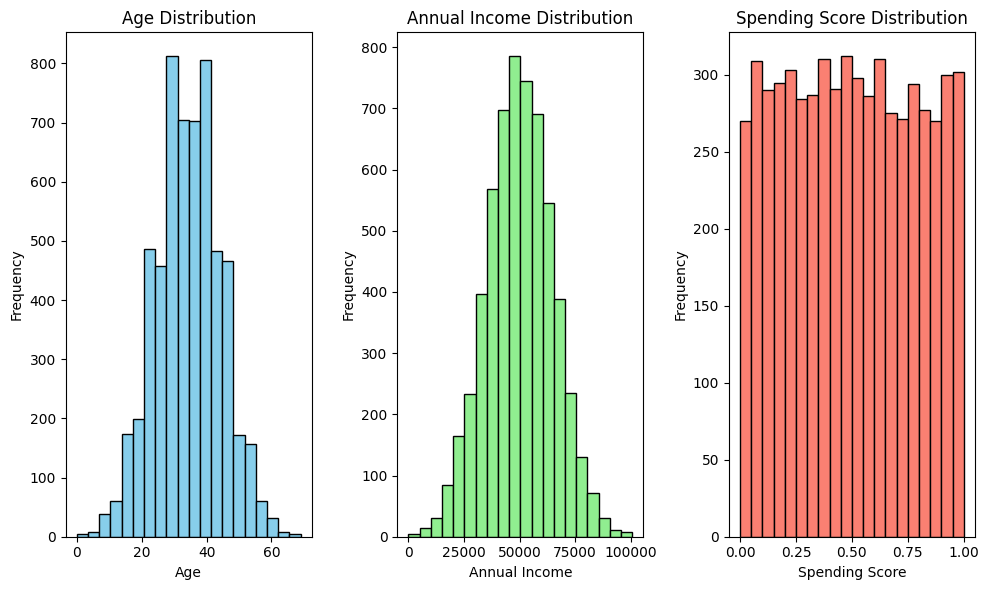

In [56]:
the_input = df[['Age', 'Annual_Income', 'Spending_Score']]
the_output = df['Purchase_Frequency']
x_train, x_test, y_train, y_test = train_test_split(the_input, the_output, test_size=0.2, random_state=43)
regressor = DecisionTreeRegressor()
the_AI = regressor.fit(x_train, y_train)
prediction = the_AI.predict(x_test)
np.sum(abs(prediction - y_test) < 10) / x_test.shape[0]

# Take the inputs from the user
age = int(input("Enter age: "))
annual_income = float(input("Enter annual income: "))
spending_score = float(input("Enter spending score: "))

# Ensure the input data is in a DataFrame with the correct columns
input_data = pd.DataFrame([[age, annual_income, spending_score]], columns=['Age', 'Annual_Income', 'Spending_Score'])

# Make the prediction
prediction = the_AI.predict(input_data)

# Print the prediction
print(prediction[0])

# Plotting the distribution of features
plt.figure(figsize=(10, 6))

# Subplot for Age
plt.subplot(1, 3, 1)
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Subplot for Annual Income
plt.subplot(1, 3, 2)
plt.hist(df['Annual_Income'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Subplot for Spending Score
plt.subplot(1, 3, 3)
plt.hist(df['Spending_Score'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
